In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
data=pd.read_csv("reddit.csv")
data.head()

C:\Users\Vishal Gardas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,fhxfeg,Perhaps the simplest and most straightforward ...,1,YoungGoatz,NaN,NaN,0.0,[],1584094737,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
1,fhx342,[OC] Number of emails sent by RWTH Aachen Univ...,1,Lukas3226,NaN,NaN,0.0,[],1584092621,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
2,fhwyvg,"[OC] Key Changes in the ""Legally Blonde the Mu...",1,burnt-store-studio,NaN,NaN,0.0,[],1584091878,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
3,fhwsht,[OC] Comparison of statistical probabilities o...,1,Deslan,NaN,NaN,0.0,[],1584090697,https://www.reddit.com/r/dataisbeautiful/comme...,5,False
4,fhwraa,COVID-19 testing in Italy [OC],1,captchalove,OC: 14,NaN,0.0,[],1584090483,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166219 entries, 0 to 166218
Data columns (total 12 columns):
id                       166219 non-null object
title                    166218 non-null object
score                    166219 non-null int64
author                   166219 non-null object
author_flair_text        20584 non-null object
removed_by               3557 non-null object
total_awards_received    26213 non-null float64
awarders                 15538 non-null object
created_utc              166219 non-null int64
full_link                166219 non-null object
num_comments             166219 non-null int64
over_18                  166219 non-null bool
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 14.1+ MB


In [190]:
data.score.nunique()

3946

In [191]:
(data.isnull().sum())/len(data)*100

id                        0.000000
title                     0.000602
score                     0.000000
author                    0.000000
author_flair_text        87.616337
removed_by               97.860052
total_awards_received    84.229841
awarders                 90.652092
created_utc               0.000000
full_link                 0.000000
num_comments              0.000000
over_18                   0.000000
dtype: float64

In [192]:
del data['id']
del data['author_flair_text']
del data['removed_by']
del data['total_awards_received']
del data['awarders']
del data['created_utc']
del data['full_link']

In [193]:
data.head()

,title,score,author,num_comments,over_18
0,Perhaps the simplest and most straightforward ...,1,YoungGoatz,1,False
1,[OC] Number of emails sent by RWTH Aachen Univ...,1,Lukas3226,2,False
2,"[OC] Key Changes in the ""Legally Blonde the Mu...",1,burnt-store-studio,2,False
3,[OC] Comparison of statistical probabilities o...,1,Deslan,5,False
4,COVID-19 testing in Italy [OC],1,captchalove,2,False


In [194]:
data = data.dropna()

In [195]:
data.head()

,title,score,author,num_comments,over_18
0,Perhaps the simplest and most straightforward ...,1,YoungGoatz,1,False
1,[OC] Number of emails sent by RWTH Aachen Univ...,1,Lukas3226,2,False
2,"[OC] Key Changes in the ""Legally Blonde the Mu...",1,burnt-store-studio,2,False
3,[OC] Comparison of statistical probabilities o...,1,Deslan,5,False
4,COVID-19 testing in Italy [OC],1,captchalove,2,False


In [196]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,166218.0,201.833129,2041.376569,0.0,1.0,1.0,6.0,116226.0
num_comments,166218.0,25.334248,193.874800,0.0,1.0,1.0,4.0,18801.0


In [197]:
print(len(data[data['num_comments']<10]), 'posts with less than 10 comments')
print(len(data[data['num_comments']>10]), 'posts with more than 10 comments')

144058 posts with less than 10 comments
20461 posts with more than 10 comments


In [198]:
data[data['score']==data['score'].max()]['title'].iloc[0]

'Imagine having to pay money to share your data. Save net neutrality today!'

# Creating a wordcloud

In [199]:
from wordcloud import WordCloud, STOPWORDS

In [200]:
words = data['title'].values

In [201]:
type(words[80324])

str

In [202]:
ls = []

for i in words:
    ls.append(str(i))

In [203]:
ls[:2]

['Perhaps the simplest and most straightforward summary of the coronavirus situation, from the Financial Times. Note the log scale- a straight line means that cases are growing exponentially.',
 '[OC] Number of emails sent by RWTH Aachen University to its students that have "Corona" in the subject']

(-0.5, 1599.5, 999.5, -0.5)

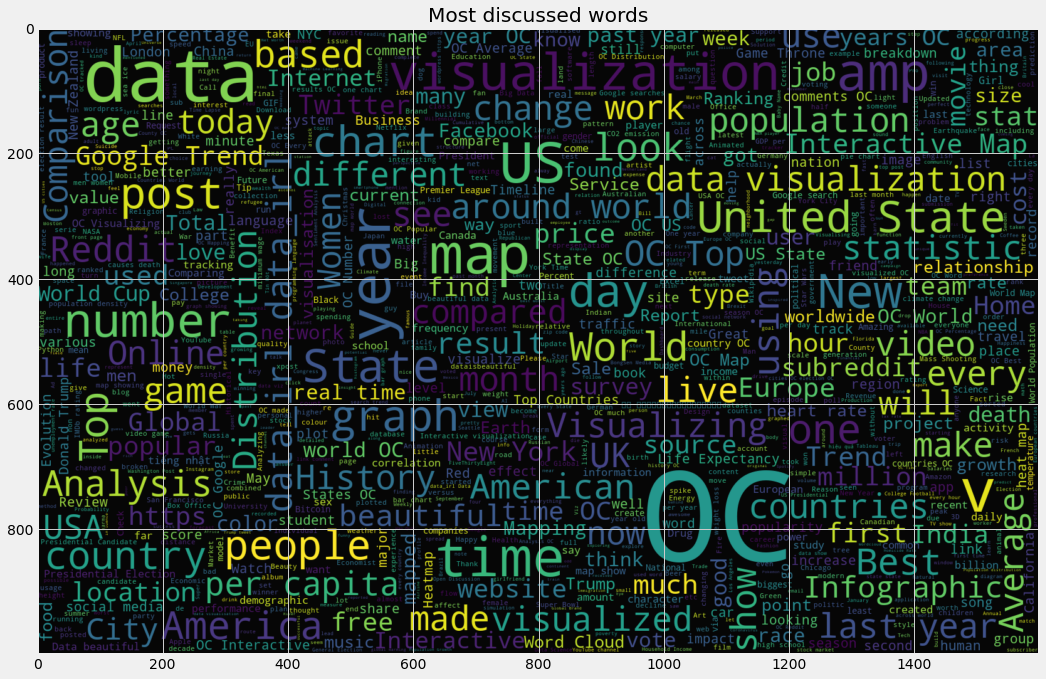

In [204]:
plt.figure(figsize=(16,16))
wc = WordCloud(background_color='black', stopwords=STOPWORDS,
              max_words=1000, max_font_size=200, width=1600, height=1000)
wc.generate(" ".join(ls))
plt.title("Most discussed words")
plt.imshow(wc.recolor(colormap='viridis', random_state=17), alpha=0.98,
          interpolation='bilinear')
plt.axis()

In [205]:
most_pop = data.sort_values('score', ascending = False)[['title', 'score']].head(12)
most_pop['score1']=most_pop['score']/1000
most_pop

,title,score,score1
62638,Imagine having to pay money to share your data...,116226,116.226
29519,Let's hear it for the lurkers! The vast majori...,105255,105.255
52423,Cause of Death - Reality vs. Google vs. Media ...,101451,101.451
52659,Gaze and foot placement when walking over roug...,99611,99.611
15147,"Light Speed – fast, but slow [OC]",92686,92.686
7122,Area of land burnt in Australia and area of sm...,91017,91.017
18043,I recorded my travels as a professional truck ...,88709,88.709
54558,"11 different brands of AA batteries, tested in...",84422,84.422
51012,The City is Alive: The Population of Manhattan...,76726,76.726
13106,[OC] I cycled through all the streets Central ...,67275,67.275


In [206]:
import matplotlib.style as style

In [207]:
style.use("fivethirtyeight")

Text(0.5, 1.0, 'Most popular posts')

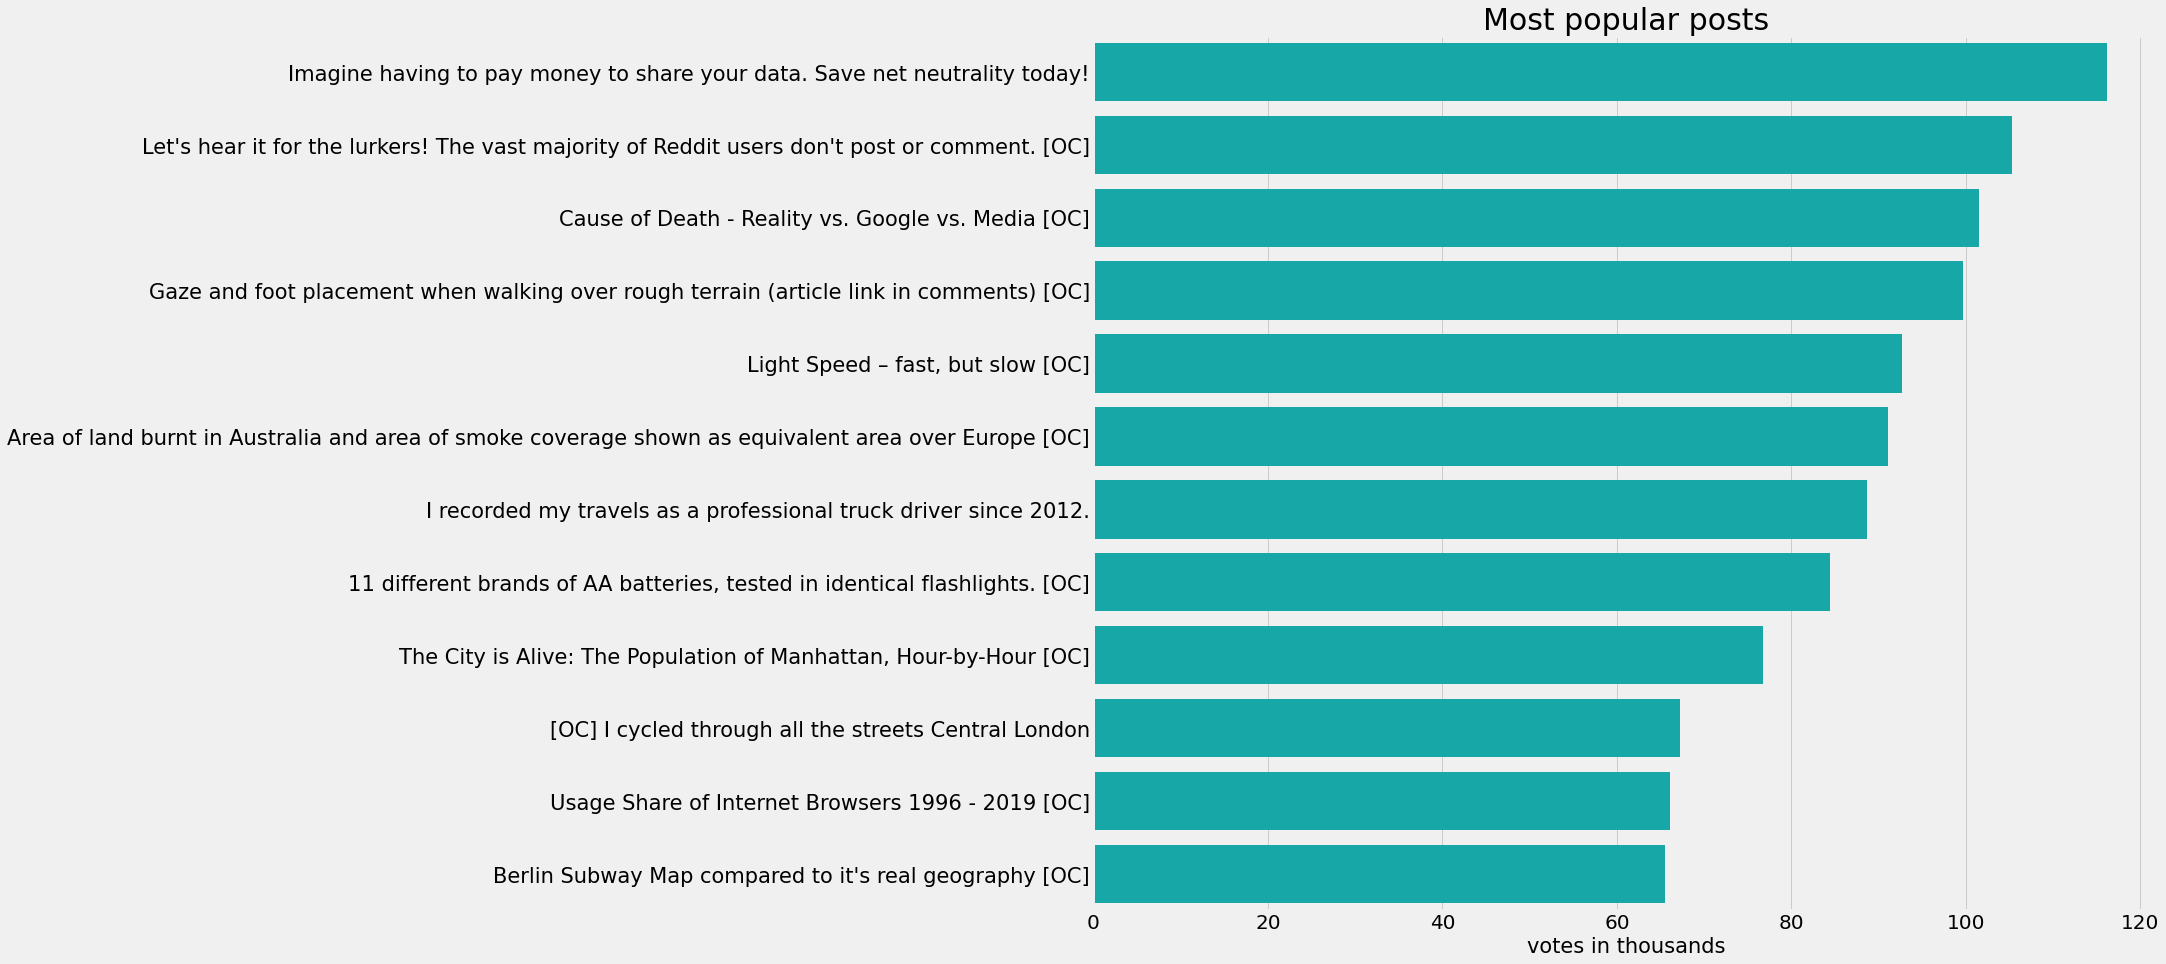

In [208]:
plt.figure(figsize=(17,15))
sns.barplot(data=most_pop, y='title', x='score1', color='c')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=21, rotation=0)
plt.xlabel("votes in thousands", fontsize =21)
plt.ylabel("")
plt.title('Most popular posts', fontsize=30)

In [209]:
data.head()

,title,score,author,num_comments,over_18
0,Perhaps the simplest and most straightforward ...,1,YoungGoatz,1,False
1,[OC] Number of emails sent by RWTH Aachen Univ...,1,Lukas3226,2,False
2,"[OC] Key Changes in the ""Legally Blonde the Mu...",1,burnt-store-studio,2,False
3,[OC] Comparison of statistical probabilities o...,1,Deslan,5,False
4,COVID-19 testing in Italy [OC],1,captchalove,2,False


In [210]:
most_com = data.sort_values('num_comments', ascending = False)[['title', 'num_comments', 'author']].head(12)
most_com['num_comments1']=most_com['num_comments']/1000
most_com.head()

,title,num_comments,author,num_comments1
80336,data_irl,18801,mungoflago,18.801
58106,Police killing rates in G7 members [OC],10425,Udzu,10.425
81675,What's getting cut in Trump's budget,8768,Prince-Akeem,8.768
100436,Almost all men are stronger than almost all wo...,7538,grasshoppermouse,7.538
73015,America’s new tobacco crisis: The rich stopped...,7418,OverflowDs,7.418


In [211]:
x = data.reset_index()
x[x['index']==92800]

,index,title,score,author,num_comments,over_18
92799,92800,I made a chart showing the popular vote turnou...,45874,dinoignacio,7058,False


Text(0.5, 1.0, 'Most commented posts')

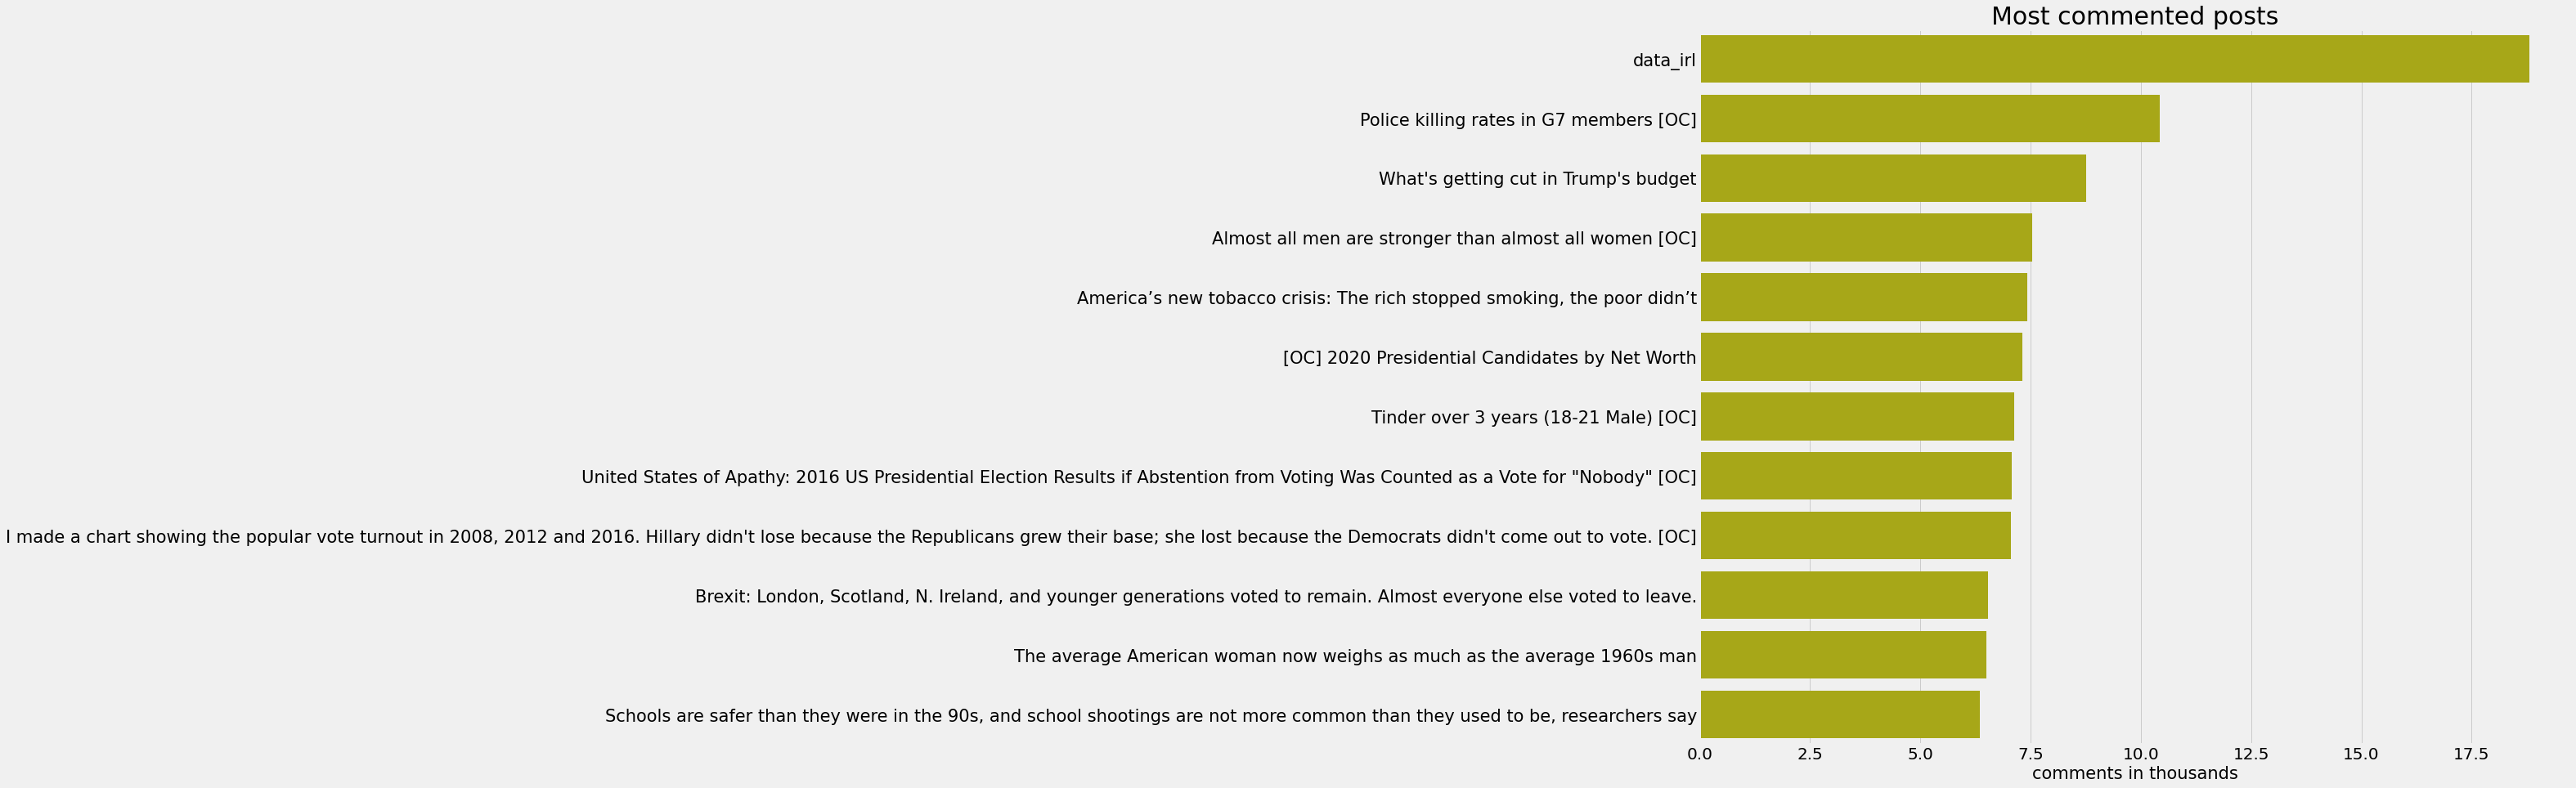

In [212]:
plt.figure(figsize=(17,15))
sns.barplot(data=most_com, y='title', x='num_comments1', color='y')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=21, rotation=0)
plt.xlabel("comments in thousands", fontsize =21)
plt.ylabel("")
plt.title('Most commented posts', fontsize=30)

In [213]:
n = data.sort_values('score', ascending=False)
n['score1']=n['score']/1000
n['num_comments1']=n['num_comments']/1000

Text(0.5, 1.0, 'Comments and votes')

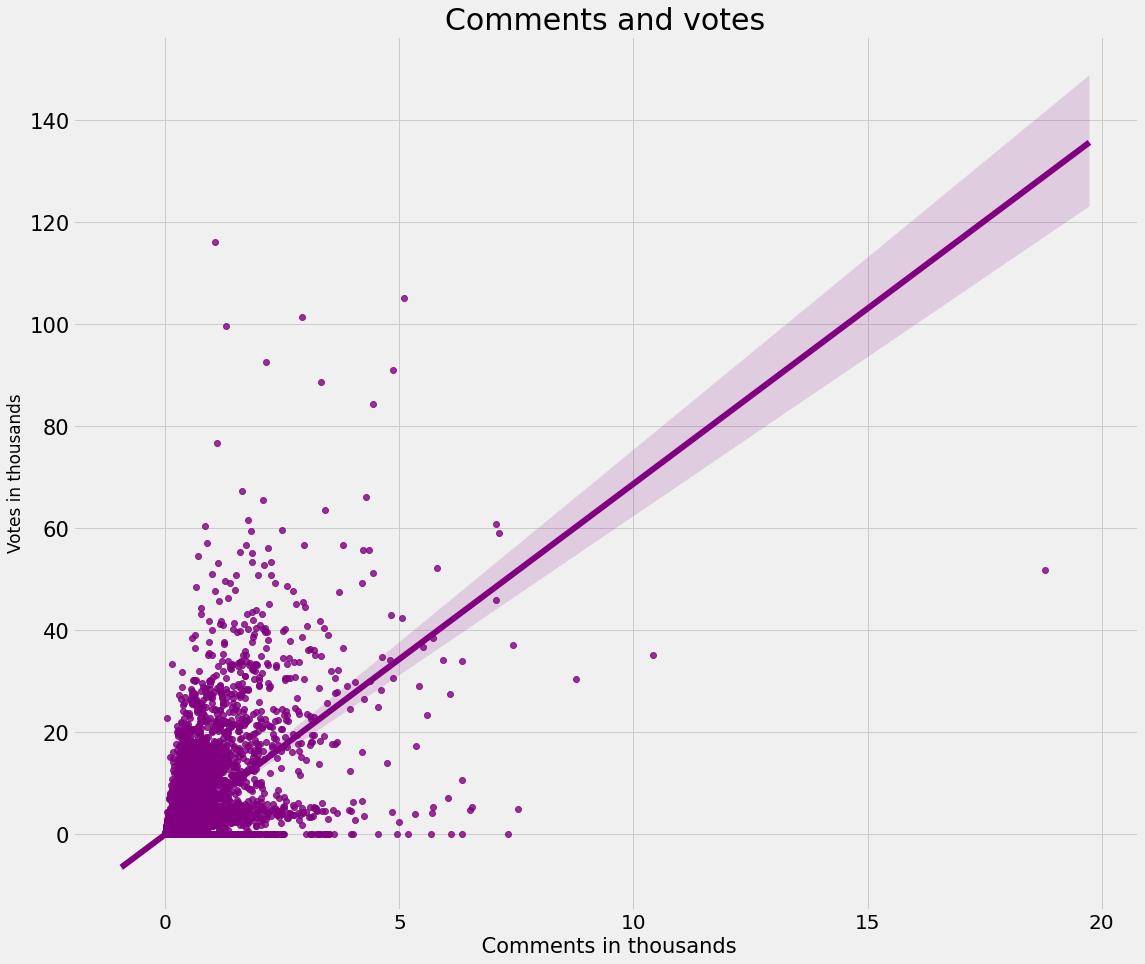

In [214]:
plt.figure(figsize=(17,15))
sns.regplot(data=n, y='score1', x='num_comments1', color='purple')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=21, rotation=0)
plt.xlabel(" Comments in thousands", fontsize =21)
plt.ylabel("Votes in thousands")
plt.title('Comments and votes', fontsize=30)

# NLP

In [215]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(2018)
import nltk

In [216]:
stemmer = SnowballStemmer('english')

In [217]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Vishal
[nltk_data]     Gardas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [218]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [219]:
data['title'].iloc[1]

'[OC] Number of emails sent by RWTH Aachen University to its students that have "Corona" in the subject'

In [220]:
doc_sample = data['title'].iloc[1]
print('original document:')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document:
['[OC]', 'Number', 'of', 'emails', 'sent', 'by', 'RWTH', 'Aachen', 'University', 'to', 'its', 'students', 'that', 'have', '"Corona"', 'in', 'the', 'subject']


 tokenized and lemmatized document: 
['number', 'email', 'send', 'rwth', 'aachen', 'univers', 'student', 'corona', 'subject']


In [221]:
processed_docs = data['title'].map(preprocess)
processed_docs[:10]

0    [simplest, straightforward, summari, coronavir...
1    [number, email, send, rwth, aachen, univers, s...
2                  [chang, legal, blond, music, score]
3    [comparison, statist, probabl, covid, death, r...
4                                 [covid, test, itali]
5                           [day, peak, histor, crise]
6    [covid, error, john, hopkin, databas, number, ...
7                           [day, peak, histor, crise]
8                                    [centenari, race]
9                                [hint, corona, virus]
Name: title, dtype: object

In [222]:
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k,v)
    count +=1
    if count >10:
        break

0 case
1 coronavirus
2 exponenti
3 financi
4 grow
5 line
6 mean
7 note
8 scale
9 simplest
10 situat


In [223]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [224]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(22, 1), (2281, 1)]

In [225]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0],
                                                    dictionary[bow_doc_4310[i][0]],
                                                    bow_doc_4310[i][1]))

Word 22 ("legal") appears 1 time.
Word 2281 ("scrap") appears 1 time.


In [226]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.24390766914235928),
 (1, 0.24493481845354784),
 (2, 0.3249557486415109),
 (3, 0.2832154605340884),
 (4, 0.25940635134781587),
 (5, 0.2396530837274555),
 (6, 0.26057699860824285),
 (7, 0.3039591150227345),
 (8, 0.25789242199657586),
 (9, 0.3458902230208058),
 (10, 0.32453068030664295),
 (11, 0.3127286126692457),
 (12, 0.14291284465104215)]


In [227]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, 
                                       id2word=dictionary, 
                                       passes=2, workers=2)

In [228]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

Topic: 0 
Words: 0.026*"game" + 0.022*"team" + 0.021*"movi" + 0.018*"post" + 0.018*"popular" + 0.016*"player" + 0.016*"season" + 0.014*"visual" + 0.013*"time" + 0.012*"name"
Topic: 1 
Words: 0.057*"post" + 0.028*"reddit" + 0.025*"word" + 0.022*"comment" + 0.015*"subreddit" + 0.015*"price" + 0.014*"visual" + 0.014*"polit" + 0.013*"languag" + 0.010*"internet"
Topic: 2 
Words: 0.034*"time" + 0.026*"life" + 0.025*"global" + 0.024*"spend" + 0.022*"real" + 0.015*"footbal" + 0.015*"market" + 0.015*"usag" + 0.013*"activ" + 0.011*"share"
Topic: 3 
Words: 0.053*"data" + 0.047*"visual" + 0.039*"year" + 0.025*"googl" + 0.018*"graph" + 0.018*"trend" + 0.015*"video" + 0.014*"search" + 0.013*"chart" + 0.011*"past"
Topic: 4 
Words: 0.059*"countri" + 0.054*"data" + 0.029*"beauti" + 0.029*"like" + 0.026*"look" + 0.023*"world" + 0.014*"europ" + 0.014*"visual" + 0.011*"size" + 0.011*"servic"
Topic: 5 
Words: 0.042*"world" + 0.019*"data" + 0.017*"visual" + 0.016*"interact" + 0.015*"visualis" + 0.012*"map" 

In [229]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, 
                                       id2word=dictionary, 
                                       passes=2, workers=4)

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

Topic: 0 
Words: 0.022*"visual" + 0.016*"week" + 0.015*"year" + 0.014*"compani" + 0.013*"traffic" + 0.012*"colleg" + 0.011*"music" + 0.011*"health" + 0.010*"review" + 0.009*"websit"
Topic: 1 
Words: 0.020*"word" + 0.018*"year" + 0.017*"number" + 0.013*"time" + 0.011*"kill" + 0.010*"book" + 0.009*"song" + 0.009*"attack" + 0.009*"name" + 0.007*"frequenc"
Topic: 2 
Words: 0.025*"citi" + 0.015*"data" + 0.013*"visual" + 0.011*"rate" + 0.010*"drug" + 0.009*"locat" + 0.007*"york" + 0.007*"crime" + 0.007*"road" + 0.007*"map"
Topic: 3 
Words: 0.025*"rat" + 0.021*"movi" + 0.019*"game" + 0.013*"visual" + 0.013*"https" + 0.012*"color" + 0.012*"year" + 0.011*"wordpress" + 0.010*"shoot" + 0.010*"play"
Topic: 4 
Words: 0.050*"state" + 0.030*"popul" + 0.018*"america" + 0.018*"year" + 0.017*"unit" + 0.017*"world" + 0.017*"chang" + 0.015*"incom" + 0.014*"countri" + 0.014*"life"
Topic: 5 
Words: 0.038*"countri" + 0.027*"state" + 0.027*"world" + 0.024*"googl" + 0.020*"death" + 0.019*"elect" + 0.019*"searc

In [230]:
processed_docs[4]

['covid', 'test', 'itali']

In [231]:
for index, score in sorted(lda_model[bow_corpus[4]], key = lambda tup:-1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.4269305169582367	 
Topic: 0.012*"trump" + 0.011*"survey" + 0.011*"stat" + 0.010*"london" + 0.010*"open" + 0.009*"post" + 0.009*"time" + 0.008*"presid" + 0.008*"escort" + 0.008*"girl"

Score: 0.37305834889411926	 
Topic: 0.025*"rat" + 0.021*"movi" + 0.019*"game" + 0.013*"visual" + 0.013*"https" + 0.012*"color" + 0.012*"year" + 0.011*"wordpress" + 0.010*"shoot" + 0.010*"play"

Score: 0.02500225231051445	 
Topic: 0.079*"data" + 0.032*"visual" + 0.029*"world" + 0.022*"beauti" + 0.017*"chart" + 0.012*"like" + 0.012*"time" + 0.012*"analysi" + 0.011*"year" + 0.011*"interact"

Score: 0.025002168491482735	 
Topic: 0.020*"word" + 0.018*"year" + 0.017*"number" + 0.013*"time" + 0.011*"kill" + 0.010*"book" + 0.009*"song" + 0.009*"attack" + 0.009*"name" + 0.007*"frequenc"

Score: 0.02500211074948311	 
Topic: 0.038*"countri" + 0.027*"state" + 0.027*"world" + 0.024*"googl" + 0.020*"death" + 0.019*"elect" + 0.019*"search" + 0.015*"trend" + 0.014*"vote" + 0.014*"popular"

Score: 0.025001714006

In [232]:
unseen_document = 'How a Pentagon deal became an identity crisis for google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup:-1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.3205934166908264	 Topic: 0.020*"word" + 0.018*"year" + 0.017*"number" + 0.013*"time" + 0.011*"kill"
Score: 0.31757521629333496	 Topic: 0.022*"visual" + 0.016*"week" + 0.015*"year" + 0.014*"compani" + 0.013*"traffic"
Score: 0.22179877758026123	 Topic: 0.020*"graph" + 0.013*"hour" + 0.011*"show" + 0.011*"spend" + 0.009*"time"
Score: 0.020017575472593307	 Topic: 0.038*"countri" + 0.027*"state" + 0.027*"world" + 0.024*"googl" + 0.020*"death"
Score: 0.020006675273180008	 Topic: 0.037*"post" + 0.028*"best" + 0.025*"reddit" + 0.014*"comment" + 0.014*"visual"
Score: 0.020003989338874817	 Topic: 0.079*"data" + 0.032*"visual" + 0.029*"world" + 0.022*"beauti" + 0.017*"chart"
Score: 0.02000373974442482	 Topic: 0.025*"citi" + 0.015*"data" + 0.013*"visual" + 0.011*"rate" + 0.010*"drug"
Score: 0.02000032179057598	 Topic: 0.025*"rat" + 0.021*"movi" + 0.019*"game" + 0.013*"visual" + 0.013*"https"
Score: 0.02000025473535061	 Topic: 0.012*"trump" + 0.011*"survey" + 0.011*"stat" + 0.010*"london" 

# Predict over_18 titles

In [233]:
data['over_18'] = data['over_18'].astype(int)

In [234]:
data['over_18'] = pd.Categorical(data['over_18'])

In [235]:
data['over_18'].value_counts()

0    165354
1       864
Name: over_18, dtype: int64

In [236]:
(data['over_18'].value_counts()/len(data)*100)

0    99.480201
1     0.519799
Name: over_18, dtype: float64

In [237]:
from sklearn.utils import resample

In [238]:
df_majority = data[data.over_18==0]
df_minority = data[data.over_18==1]

df_minority_unsampled = resample(df_minority, replace = True,
                                n_samples = 80000)

data_n = pd.concat([df_majority, df_minority_unsampled])

data_n['over_18'].value_counts()

0    165354
1     80000
Name: over_18, dtype: int64

In [239]:
(data_n['over_18'].value_counts()/len(data_n)*100)

0    67.394051
1    32.605949
Name: over_18, dtype: float64

In [240]:
import nltk
import string
from nltk.corpus import stopwords

In [241]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [242]:
data['title'].head(4).apply(text_process)

0    [Perhaps, simplest, straightforward, summary, ...
1    [OC, Number, emails, sent, RWTH, Aachen, Unive...
2    [OC, Key, Changes, Legally, Blonde, Musical, S...
3    [OC, Comparison, statistical, probabilities, C...
Name: title, dtype: object

In [243]:
from sklearn.feature_extraction.text import CountVectorizer

In [244]:
#BOW
bow_transformer = CountVectorizer(analyzer=text_process).fit(data_n['title'])

print(len(bow_transformer.vocabulary_))

105083


In [245]:
data4 = data_n['title'][3]
print(data4)

[OC] Comparison of statistical probabilities of Covid-19 deaths (reported by China from population-wide infection) versus other things that can happen to a Swedish citizen.


In [246]:
bow4 = bow_transformer.transform([data4])
print(bow4)
print(bow4.shape)

  (0, 15010)	1
  (0, 16031)	1
  (0, 16841)	1
  (0, 38488)	1
  (0, 50968)	1
  (0, 63290)	1
  (0, 65700)	1
  (0, 71609)	1
  (0, 74911)	1
  (0, 82946)	1
  (0, 83500)	1
  (0, 85949)	1
  (0, 89760)	1
  (0, 91402)	1
  (0, 94111)	1
(1, 105083)


In [247]:
print(bow_transformer.get_feature_names()[1])
print(bow_transformer.get_feature_names()[50000])

khuyên
Stately


In [248]:
data_bow = bow_transformer.transform(data_n['title'])

In [249]:
print("Shape of the sparse matrix:", data_bow.shape)
print("Amount of non-zero occurances:", data_bow.nnz)

Shape of the sparse matrix: (245354, 105083)
Amount of non-zero occurances: 1740498


In [250]:
from sklearn.feature_extraction.text import TfidfTransformer

In [251]:
tfidf_transformer = TfidfTransformer().fit(data_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 94111)	0.22568524205998497
  (0, 91402)	0.23163646565092047
  (0, 89760)	0.24858083691600352
  (0, 85949)	0.24351819759084073
  (0, 83500)	0.2882129942728534
  (0, 82946)	0.3833864960595085
  (0, 74911)	0.29307471498424265
  (0, 71609)	0.2823975634957288
  (0, 65700)	0.21422363458000618
  (0, 63290)	0.3125000255543138
  (0, 50968)	0.2356199560458806
  (0, 38488)	0.06310728518758858
  (0, 16841)	0.29233031140648486
  (0, 16031)	0.20788484842430877
  (0, 15010)	0.21657243709913243


In [252]:
data_tfidf = tfidf_transformer.transform(data_bow)
print(data_tfidf.shape)

(245354, 105083)


In [253]:
data_n['over_18']=pd.Categorical(data_n['over_18'])

In [254]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(data_tfidf, data_n['over_18'])

In [255]:
all_predictions = model.predict(data_tfidf)
print(all_predictions)

[0 0 0 ... 1 1 1]


In [256]:
from sklearn.metrics import classification_report
print(classification_report(data_n['over_18'], all_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    165354
           1       0.97      0.98      0.97     80000

    accuracy                           0.98    245354
   macro avg       0.98      0.98      0.98    245354
weighted avg       0.98      0.98      0.98    245354



In [257]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(data_n['title'],
                                                               data_n['over_18'],
                                                                test_size=0.2)
print(len(msg_train), len(msg_test))

196283 49071


In [258]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())])

In [259]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021FABC928C8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [260]:
predictions = pipeline.predict(msg_test)

In [261]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     32732
           1       0.98      0.96      0.97     16339

    accuracy                           0.98     49071
   macro avg       0.98      0.97      0.98     49071
weighted avg       0.98      0.98      0.98     49071

